In [2]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import yfinance as yf

symbol = '^N225'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(start='2019-01-01', end='2024-10-01', interval='1mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-01 00:00:00+09:00,19655.130859,20892.679688,19241.369141,20773.490234,1275600000,0.0,0.0
2019-02-01 00:00:00+09:00,20797.029297,21610.880859,20315.310547,21385.160156,1276100000,0.0,0.0
2019-03-01 00:00:00+09:00,21490.019531,21860.390625,20911.570312,21205.810547,1396900000,0.0,0.0
2019-04-01 00:00:00+09:00,21500.890625,22362.919922,21471.119141,22258.730469,1187800000,0.0,0.0
2019-05-01 00:00:00+09:00,22184.400391,22190.490234,20581.580078,20601.189453,1458100000,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-01 00:00:00+09:00,38107.378906,39437.160156,37617.000000,38487.898438,2632400000,0.0,0.0
2024-06-01 00:00:00+09:00,38734.949219,39788.628906,37950.199219,39583.078125,2209000000,0.0,0.0
2024-07-01 00:00:00+09:00,39839.820312,42426.769531,37611.191406,39101.820312,2570500000,0.0,0.0


In [3]:
sqfile = 'SQ.csv'
df_sq = pd.read_csv(sqfile)
df_sq

,Month,Nikkei225
0,2019-01-01,20290.67
1,2019-02-01,20481.02
2,2019-03-01,21348.40
3,2019-04-01,21870.84
4,2019-05-01,21451.91
...,...,...
64,2024-05-01,38509.47
65,2024-06-01,38535.35
66,2024-07-01,41531.26
67,2024-08-01,35661.68


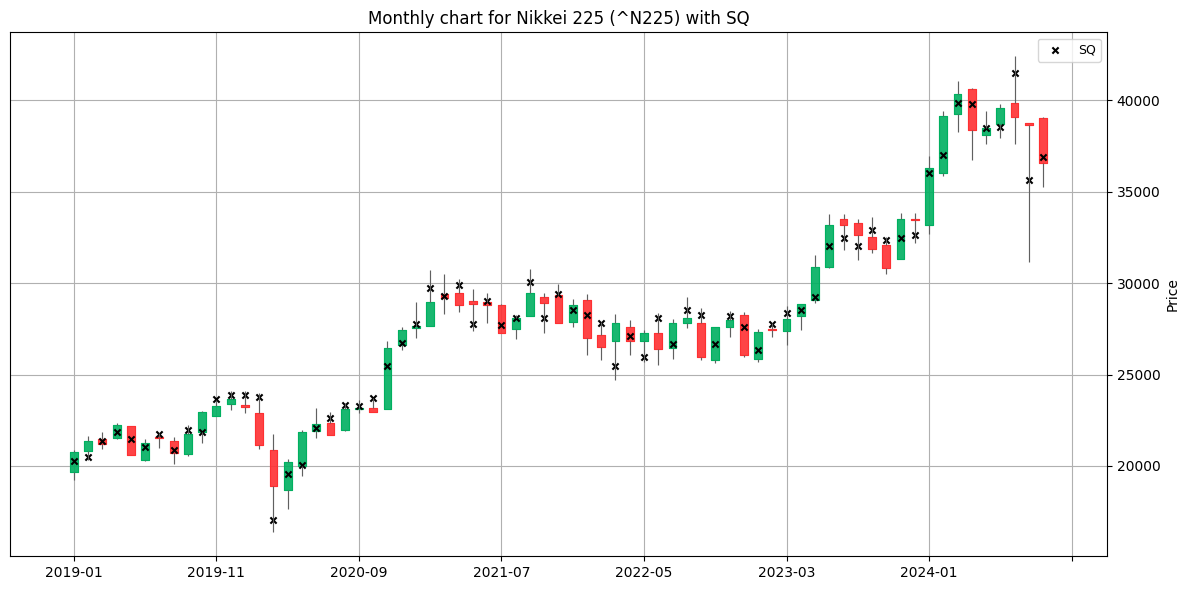

In [5]:
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

apds = [
    mpf.make_addplot(df_sq['Nikkei225'], type='scatter', color='black', marker='x', markersize=20, label='SQ', ax=ax),
]

mpf.plot(
    df,
    type='candle',
    style='yahoo',
    volume=False,
    datetime_format='%Y-%m',
    xrotation=0,
    addplot=apds,
    ax=ax,
)
ax.set_title('Monthly chart for %s (%s) with SQ' %(ticker.info['longName'], symbol))
ax.legend(loc='best', fontsize=9, frameon=True)
ax.grid()

plt.tight_layout()
plt.savefig('monthly_chart_n225_sq.png')
plt.show()